# Neural Network for Leafs - Sophia Report Version

## Preliminaries

In [3]:
# Import packages
import sys
import os
print('Current working directory:', os.getcwd())
# If academia_ai is not installed, include its path here (you might have to enter your custom path here)
path_to_academia_ai = os.path.join(os.pardir, os.pardir)
#path_to_academia_ai = 'C:\\Users\\sophi\\Dropbox\\academia_2016\\academia_AI'
if path_to_academia_ai not in sys.path:
    sys.path.append(path_to_academia_ai)
import numpy as np
from timeit import default_timer as timer
# Can use inline instead of notebook or remove this magic and use
# plt.show() to get plots in seperate windows
%matplotlib notebook 
import matplotlib.pyplot as plt
import academia_ai as ai

Current working directory: /home/patrick/Dropbox/academia_2016/academia_ai/academia_ai/examples


In [6]:
# Load leafs from disk and do some preprocessing
l_train = [] # training set
l_test = [] # testing set
for n in range (7):
    matrices = np.load(os.path.join(os.pardir, 'leafs', 'data', str(n)+'.npy'))
    
    for i in range(799): # 2x799 for training
        l_train += [ai.leafs.Leaf(i+n*1000, n, matrices[i]/255)] # Leaf(iid,label,matrix,labelstr) *labelstr deleted ..too difficult
        
    for i in range(799,899): # 2x100 for testing
        l_test += [ai.leafs.Leaf(i+n*1000, n, matrices[i]/255)]
        
np.random.shuffle(l_train)
np.random.shuffle(l_test)
#plt.figure()
#plt.imshow(l_train[0].image, cmap='Greys') # show one 

# -------- Normalize data: --------------
def normalize(dataset):
    # calculate the mean
    mean=np.zeros(dataset[0].image.shape)
    for lea in dataset:
        mean=mean+lea.image
    mean/=len(dataset)
    #calculating the variance
    var=np.zeros(dataset[0].image.shape)
    for lea in dataset:
        var=var+(lea.image-mean)**2
    var/=len(dataset)
    f=0.1
    var=(var-f>=0)*(var-f)+f  # caps the minimal 
    for lea in dataset:
        lea.image=(lea.image-mean)/var

normalize(l_train)
normalize(l_test)
#plt.figure()

def desired_output(label):
    res = -1 * np.ones((7,1,1))
    res[label, 0, 0] = +1
    return res
    
#plt.imshow(l_train[0].image, cmap='Greys')
training_images = [np.array(leaf.image) for leaf in l_train]
training_solutions = [desired_output(leaf.label) for leaf in l_train]
test_images = [np.array(leaf.image) for leaf in l_test]
test_solutions = [desired_output(leaf.label) for leaf in l_test]

## Create layers and build neural network

In [7]:
cl = ai.ConvolutionLayer(nr_filters=12, filter_shape=(9,9), stride=1)
cl2 = ai.ConvolutionLayer(nr_filters=9, filter_shape=(9,9), stride=1)
th = ai.HyperbolicTangentLayer()
sig= ai.SigmoidLayer(learning=False)
relu=ai.ReLuLayer()
full = ai.FullyConnectedLayer(input_shape=(12,40,40), output_shape=(7,1,1))
net = ai.ConvolutionalNeuralNet() 
net.add_layer(cl)  
net.add_layer(relu)
#net.add_layer(cl2)
net.add_layer(full)

<IPython.core.display.Javascript object>


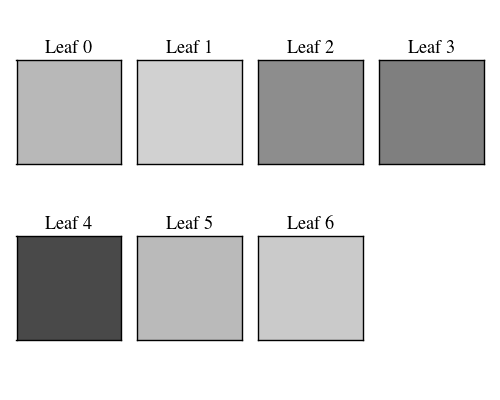

Classified label: 4
Correct label: 0


In [8]:
index = 0

leaf_ex = training_images[index]
sol_ex = training_solutions[index]
result = net.forward_prop(leaf_ex, save_intermediate=True)
intermediate = net.intermediate_results
# Plot the result after propagating through the net
'''
fig, axarr = plt.subplots(2, 4, figsize=(5,4))
for x in range(2):
    for y in range(4):
        if x+2*y == 7:
            plt.delaxes(axarr[x, y])
            continue
        axarr[x, y].imshow(result[x+2*y], cmap='Greys', vmin=-1, vmax=1)
        axarr[x, y].set_title('Leaf '+str(x+2*y))
        axarr[x, y].get_xaxis().set_visible(False)
        axarr[x, y].get_yaxis().set_visible(False)
'''
fig, axarr = plt.subplots(2,4, figsize=(5,4))
for i in range(7):
    axarr.flatten()[i].imshow(result[i],cmap='Greys', vmin=-1, vmax=1)
    axarr.flatten()[i].set_title('Leaf '+str(i))
    axarr.flatten()[i].get_xaxis().set_visible(False)
    axarr.flatten()[i].get_yaxis().set_visible(False)
plt.delaxes(axarr.flatten()[7])

plt.tight_layout()
print('Classified label:', np.argmax(result))
print('Correct label:', np.argmax(sol_ex))

In [4]:
intermediate[0]

NameError: name 'intermediate' is not defined

<IPython.core.display.Javascript object>


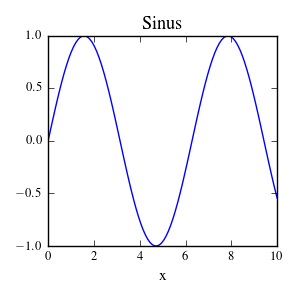

In [22]:
x=np.linspace(0,10,100)
plt.figure(figsize=(3,3))
plt.plot(x,np.sin(x))
plt.xlabel('x')
plt.title('Sinus')
plt.tight_layout()

In [99]:
training_images[0].shape

(40, 40)

<IPython.core.display.Javascript object>


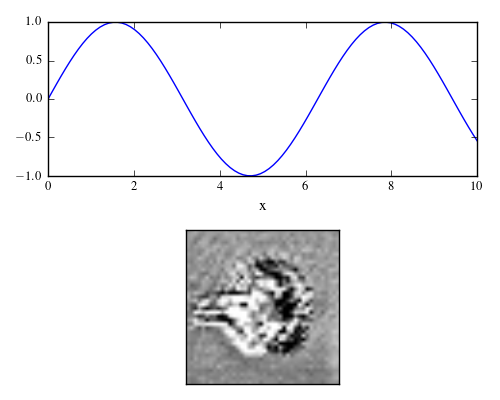

In [12]:
x=np.linspace(0,10,100)
fig, axarr = plt.subplots(2, 1, figsize=(5,4))
axarr[0].plot(x,np.sin(x))
axarr[1].imshow(intermediate[1][0],cmap='Greys',vmin=-1, vmax=1)
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[0].set_xlabel('x')

plt.tight_layout()

<IPython.core.display.Javascript object>


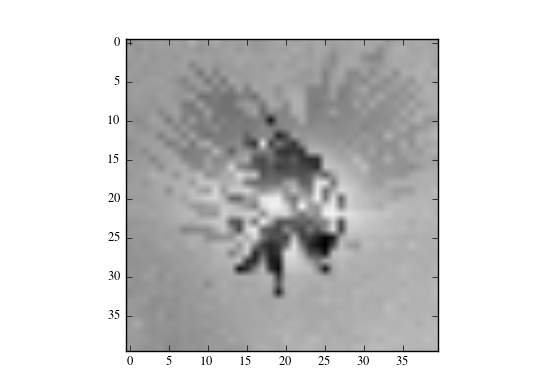

In [24]:
plt.figure()
plt.imshow(training_images[0], cmap='Greys')

In [62]:
## ADAPT images and solutions to be numpy and desired shape!

In [42]:
learning_rate = 1e-5
start = timer()
net.train(training_images, training_solutions, learning_rate, iterations=1)
end = timer()
print('Training took', end-start, 'seconds.') # (usually around 140 seconds for one iteration)

Training took 52.7693688679974 seconds.


In [33]:
# Same here...

In [77]:
net.test_net(training_images, training_solutions)

0.9715716073663508

In [44]:
net.save('data/leaf_network-small-SE-PK.pkl')

Saved net in file: data/leaf_network-small-SE-PK.pkl


In [13]:
net.load('data/leaf_network-SE-PK.pkl')

ModuleNotFoundError: No module named 'academia_AI'

In [78]:
success_point=[]
for i in range(6):
    learning_rate = 1e-5
    start = timer()
    net.train(training_images, training_solutions, learning_rate, iterations=1)
    end = timer()
    print('Training took', end-start, 'seconds.') # (usually around 140 seconds for one iteration)
    
    success_point.append(net.test_net(test_images, test_solutions))
    

Training took 51.53026971700092 seconds.
Training took 52.89118736100136 seconds.
Training took 51.46983148099753 seconds.
Training took 54.064269168000465 seconds.
Training took 52.97072689900233 seconds.
Training took 52.010301188001904 seconds.


In [72]:
labels = ['' for i in range(100)]
labels[::10] = np.linspace(0,1,10)
print(labels)

[0.0, '', '', '', '', '', '', '', '', '', 0.1111111111111111, '', '', '', '', '', '', '', '', '', 0.22222222222222221, '', '', '', '', '', '', '', '', '', 0.33333333333333331, '', '', '', '', '', '', '', '', '', 0.44444444444444442, '', '', '', '', '', '', '', '', '', 0.55555555555555558, '', '', '', '', '', '', '', '', '', 0.66666666666666663, '', '', '', '', '', '', '', '', '', 0.77777777777777768, '', '', '', '', '', '', '', '', '', 0.88888888888888884, '', '', '', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '']


<IPython.core.display.Javascript object>


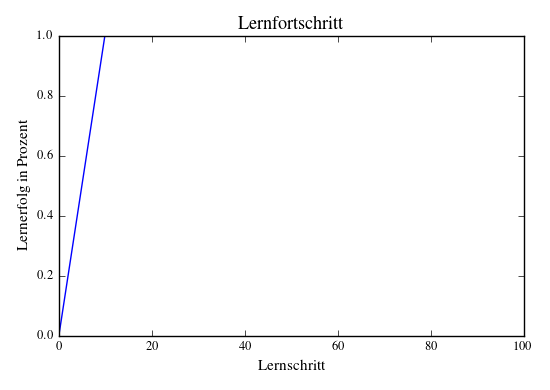

In [103]:
plt.figure()
plt.plot(success_point)
plt.ylim(0,1)
plt.xlabel('Lernschritt')
plt.ylabel('Lernerfolg in Prozent')
plt.title('Lernfortschritt')
#plt.yticks(np.linspace(0,1,100), labels)
plt.tight_layout()

In [104]:
x

array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
         0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
         0.80808081,   0.90909091,   1.01010101,   1.11111111,
         1.21212121,   1.31313131,   1.41414141,   1.51515152,
         1.61616162,   1.71717172,   1.81818182,   1.91919192,
         2.02020202,   2.12121212,   2.22222222,   2.32323232,
         2.42424242,   2.52525253,   2.62626263,   2.72727273,
         2.82828283,   2.92929293,   3.03030303,   3.13131313,
         3.23232323,   3.33333333,   3.43434343,   3.53535354,
         3.63636364,   3.73737374,   3.83838384,   3.93939394,
         4.04040404,   4.14141414,   4.24242424,   4.34343434,
         4.44444444,   4.54545455,   4.64646465,   4.74747475,
         4.84848485,   4.94949495,   5.05050505,   5.15151515,
         5.25252525,   5.35353535,   5.45454545,   5.55555556,
         5.65656566,   5.75757576,   5.85858586,   5.95959596,
         6.06060606,   6.16161616,   6.26262626,   6.36